In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
bike = pd.read_csv("TRAIN.csv",parse_dates=True)

In [3]:
bike.Hour.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [4]:
bike.drop('Index',axis = 1, inplace = True )

In [5]:
bike.shape

(7032, 14)

In [6]:
bike.describe()

Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
count  7032.000000      7032.000000  7032.000000       7032.000000   
mean     11.500000        13.154778    58.164960          1.785708   
std       6.922679        12.997927    20.637447          1.053112   
min       0.000000       -17.800000     0.000000          0.000000   
25%       5.750000         1.800000    42.000000          1.000000   
50%      11.500000        15.500000    57.000000          1.600000   
75%      17.250000        24.000000    74.000000          2.400000   
max      23.000000        39.400000    98.000000          7.400000   

       Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
count       7032.000000                7032.000000              7032.000000   
mean        1421.082480                   4.323905                 0.590294   
std          613.169137                  14.178857                 0.893909   
min           27.000000                 -30.600000                 0.000000   
25%          918.750000                  -6.700000                 0.000000   
50%         1665.000000                   6.900000                 0.020000   
75%         1996.000000                  16.500000                 0.950000   
max         2000.000000                  27.200000                 3.520000   

       Rainfall(mm)  Snowfall (cm)  Rented Bike Count  
count   7032.000000    7032.000000        7032.000000  
mean       0.152645       0.076024         689.143203  
std        1.165239       0.403487         652.151786  
min        0.000000       0.000000           0.000000  
25%        0.000000       0.000000         189.750000  
50%        0.000000       0.000000         444.000000  
75%        0.000000       0.000000        1035.000000  
max       35.000000       5.100000        3556.000000

In [7]:
bike['Seasons'].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [8]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       7032 non-null   object 
 1   Hour                       7032 non-null   int64  
 2   Temperature(°C)            7032 non-null   float64
 3   Humidity(%)                7032 non-null   int64  
 4   Wind speed (m/s)           7032 non-null   float64
 5   Visibility (10m)           7032 non-null   int64  
 6   Dew point temperature(°C)  7032 non-null   float64
 7   Solar Radiation (MJ/m2)    7032 non-null   float64
 8   Rainfall(mm)               7032 non-null   float64
 9   Snowfall (cm)              7032 non-null   float64
 10  Seasons                    7032 non-null   object 
 11  Holiday                    7032 non-null   object 
 12  Functioning Day            7032 non-null   object 
 13  Rented Bike Count          7032 non-null   int64

<AxesSubplot:xlabel='Seasons', ylabel='Rented Bike Count'>

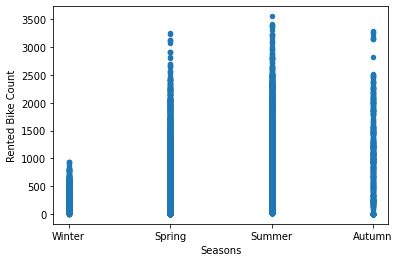

In [9]:
bike.plot.scatter(x ="Seasons" , y ="Rented Bike Count" )

<AxesSubplot:xlabel='Holiday', ylabel='Rented Bike Count'>

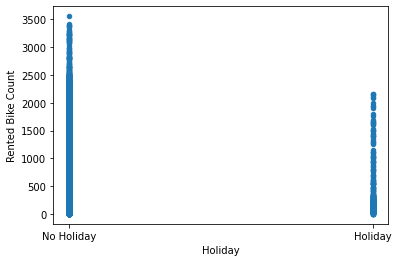

In [10]:
bike.plot.scatter(x ="Holiday" , y ="Rented Bike Count")

<AxesSubplot:xlabel='Functioning Day', ylabel='Rented Bike Count'>

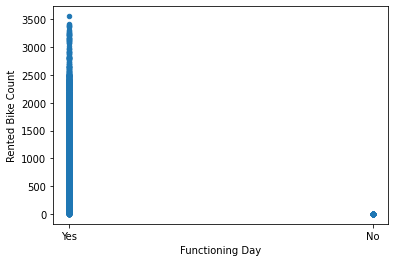

In [11]:
bike.plot.scatter(x ="Functioning Day" , y ="Rented Bike Count")

In [12]:
bike['Date'] = pd.to_datetime(bike['Date'])
bike.set_index('Date', inplace=True)

In [13]:
bike.head()

Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
Date                                                               
2017-01-12     0             -5.2           37               2.2   
2017-01-12     1             -5.5           38               0.8   
2017-01-12     2             -6.0           39               1.0   
2017-01-12     3             -6.2           40               0.9   
2017-01-12     4             -6.0           36               2.3   

            Visibility (10m)  Dew point temperature(°C)  \
Date                                                      
2017-01-12              2000                      -17.6   
2017-01-12              2000                      -17.6   
2017-01-12              2000                      -17.7   
2017-01-12              2000                      -17.6   
2017-01-12              2000                      -18.6   

            Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
Date                                                                       
2017-01-12                      0.0           0.0            0.0  Winter   
2017-01-12                      0.0           0.0            0.0  Winter   
2017-01-12                      0.0           0.0            0.0  Winter   
2017-01-12                      0.0           0.0            0.0  Winter   
2017-01-12                      0.0           0.0            0.0  Winter   

               Holiday Functioning Day  Rented Bike Count  
Date                                                       
2017-01-12  No Holiday             Yes                254  
2017-01-12  No Holiday             Yes                204  
2017-01-12  No Holiday             Yes                173  
2017-01-12  No Holiday             Yes                107  
2017-01-12  No Holiday             Yes                 78

In [14]:
bike.Seasons.unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [15]:
bike['Seasons']=bike['Seasons'].replace({'Winter':1, 'Spring':2, 'Summer':3,'Autumn':4})

In [16]:
bike.Holiday.unique()

array(['No Holiday', 'Holiday'], dtype=object)

In [17]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
bike["Holiday"] = ord_enc.fit_transform(bike[["Holiday"]])

In [18]:
bike["Functioning Day"] = ord_enc.fit_transform(bike[["Functioning Day"]])

In [19]:
bike["Functioning Day"] = bike["Functioning Day"].astype(int)
bike["Holiday"] = bike["Holiday"].astype(int)

In [20]:
bike.head()

Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
Date                                                               
2017-01-12     0             -5.2           37               2.2   
2017-01-12     1             -5.5           38               0.8   
2017-01-12     2             -6.0           39               1.0   
2017-01-12     3             -6.2           40               0.9   
2017-01-12     4             -6.0           36               2.3   

            Visibility (10m)  Dew point temperature(°C)  \
Date                                                      
2017-01-12              2000                      -17.6   
2017-01-12              2000                      -17.6   
2017-01-12              2000                      -17.7   
2017-01-12              2000                      -17.6   
2017-01-12              2000                      -18.6   

            Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  Seasons  \
Date                                                                        
2017-01-12                      0.0           0.0            0.0        1   
2017-01-12                      0.0           0.0            0.0        1   
2017-01-12                      0.0           0.0            0.0        1   
2017-01-12                      0.0           0.0            0.0        1   
2017-01-12                      0.0           0.0            0.0        1   

            Holiday  Functioning Day  Rented Bike Count  
Date                                                     
2017-01-12        1                1                254  
2017-01-12        1                1                204  
2017-01-12        1                1                173  
2017-01-12        1                1                107  
2017-01-12        1                1                 78

<AxesSubplot:xlabel='Temperature(°C)', ylabel='Rented Bike Count'>

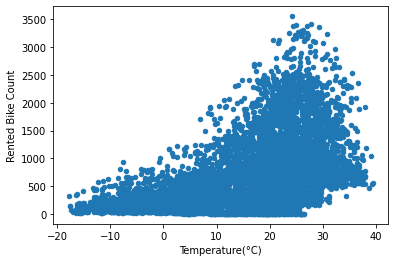

In [22]:
bike.plot.scatter(x = "Temperature(°C)",y = "Rented Bike Count")

In [23]:
test = pd.read_csv('Test.csv')

In [24]:
test.drop('Index',axis = 1, inplace = True )

In [25]:
test['Date'] = pd.to_datetime(test['Date'])
test.set_index('Date', inplace=True)

In [26]:
test['Seasons']=test['Seasons'].replace({'Winter':1, 'Spring':2, 'Summer':3,'Autumn':4})

In [27]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
test["Holiday"] = ord_enc.fit_transform(test[["Holiday"]])
test["Functioning Day"] = ord_enc.fit_transform(test[["Functioning Day"]])

In [28]:
test["Functioning Day"] = test["Functioning Day"].astype(int)
test["Holiday"] = test["Holiday"].astype(int)

In [29]:
test.tail()

Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
Date                                                               
2018-11-30    19              4.2           34               2.6   
2018-11-30    20              3.4           37               2.3   
2018-11-30    21              2.6           39               0.3   
2018-11-30    22              2.1           41               1.0   
2018-11-30    23              1.9           43               1.3   

            Visibility (10m)  Dew point temperature(°C)  \
Date                                                      
2018-11-30              1894                      -10.3   
2018-11-30              2000                       -9.9   
2018-11-30              1968                       -9.9   
2018-11-30              1859                       -9.8   
2018-11-30              1909                       -9.3   

            Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  Seasons  \
Date                                                                        
2018-11-30                      0.0           0.0            0.0        4   
2018-11-30                      0.0           0.0            0.0        4   
2018-11-30                      0.0           0.0            0.0        4   
2018-11-30                      0.0           0.0            0.0        4   
2018-11-30                      0.0           0.0            0.0        4   

            Holiday  Functioning Day  
Date                                  
2018-11-30        1                1  
2018-11-30        1                1  
2018-11-30        1                1  
2018-11-30        1                1  
2018-11-30        1                1

In [30]:
import pandas_profiling

In [31]:
bike.profile_report()

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [32]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
print('Feature      Number of NaN')
print(bike.isnull().sum().sort_values(ascending=False).loc[lambda x : x!=0])

Feature      Number of NaN
Series([], dtype: int64)


In [33]:
bike.columns

Index(['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Rented Bike Count'],
      dtype='object')

In [34]:
bike.drop((['Rainfall(mm)','Snowfall (cm)'] ),axis =1, inplace = True)

In [35]:
test.drop((['Rainfall(mm)','Snowfall (cm)'] ),axis =1, inplace = True)

In [36]:
train = bike.reset_index()

In [37]:
train.head()

Date  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0 2017-01-12     0             -5.2           37               2.2   
1 2017-01-12     1             -5.5           38               0.8   
2 2017-01-12     2             -6.0           39               1.0   
3 2017-01-12     3             -6.2           40               0.9   
4 2017-01-12     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Seasons  Holiday  Functioning Day  Rented Bike Count  
0        1        1                1                254  
1        1        1                1                204  
2        1        1                1                173  
3        1        1                1                107  
4        1        1                1                 78

<AxesSubplot:title={'center':'Year = 2018'}, xlabel='Hour'>

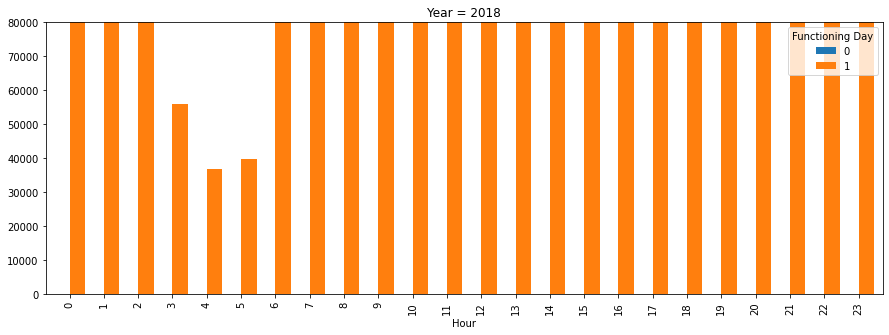

In [38]:
# method for creating the count plot based on hour for a given year 
def plot_by_hour(data, year=None, agg='sum'):
    dd = data
    if year: dd = dd[ dd.Date.dt.year == year ]
    dd.loc[:, ('hour')] = dd.Date.dt.hour # extracting the hour data if the year in the data is equal to the year passed as argument
    
    by_hour = dd.groupby(['Hour', 'Functioning Day'])['Rented Bike Count'].agg(agg).unstack() # groupby hour and working day
    return by_hour.plot(kind='bar', ylim=(0, 80000), figsize=(15,5), width=0.9, title="Year = {0}".format(year)) # returning the figure grouped by hour


plot_by_hour(train, year=2018) # plotting the count plot based on hour for 2011 
#plot_by_hour(train, year=2012) # plotting the count plot based on hour for 2012

In [39]:
bike.drop('Dew point temperature(°C)' ,axis = 1,inplace=True)
test.drop('Dew point temperature(°C)' ,axis = 1,inplace=True)

In [40]:
train['Date'] = pd.to_datetime(train['Date'])


In [41]:
train.head()

Date  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0 2017-01-12     0             -5.2           37               2.2   
1 2017-01-12     1             -5.5           38               0.8   
2 2017-01-12     2             -6.0           39               1.0   
3 2017-01-12     3             -6.2           40               0.9   
4 2017-01-12     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Seasons  Holiday  Functioning Day  Rented Bike Count  
0        1        1                1                254  
1        1        1                1                204  
2        1        1                1                173  
3        1        1                1                107  
4        1        1                1                 78

In [42]:
test = test.reset_index()

In [43]:
test['Date']= pd.to_datetime(test['Date'])

In [49]:
train.Hour.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [50]:
def categorical_to_numeric(x):
    if 0 <=  x < 6:
        return 0
    elif 6 <= x < 13:
        return 1
    elif 13 <= x < 19:
        return 2
    elif 19 <= x < 24:
        return 3

In [53]:
train['Hour'] = train['Hour']# applying the above conversion logic to training data
train.head()


Date  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0 2017-01-12     0             -5.2           37               2.2   
1 2017-01-12     0             -5.5           38               0.8   
2 2017-01-12     0             -6.0           39               1.0   
3 2017-01-12     0             -6.2           40               0.9   
4 2017-01-12     0             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Seasons  Holiday  Functioning Day  Rented Bike Count  
0        1        1                1                254  
1        1        1                1                204  
2        1        1                1                173  
3        1        1                1                107  
4        1        1                1                 78

In [52]:
test['Hour'] = test['Hour'].apply(categorical_to_numeric)# applying the above conversion logic to training data
train.head()


Date  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0 2017-01-12     0             -5.2           37               2.2   
1 2017-01-12     0             -5.5           38               0.8   
2 2017-01-12     0             -6.0           39               1.0   
3 2017-01-12     0             -6.2           40               0.9   
4 2017-01-12     0             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Seasons  Holiday  Functioning Day  Rented Bike Count  
0        1        1                1                254  
1        1        1                1                204  
2        1        1                1                173  
3        1        1                1                107  
4        1        1                1                 78

In [55]:
test['Hour'] = test['Hour'].apply(categorical_to_numeric) # applying the above conversion logic to test data
test.head()

Date  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0 2018-09-20     0             20.1           58               0.3   
1 2018-09-20     0             20.0           59               1.1   
2 2018-09-20     0             19.9           64               1.5   
3 2018-09-20     0             19.6           72               1.7   
4 2018-09-20     0             19.6           74               1.4   

   Visibility (10m)  Solar Radiation (MJ/m2)  Seasons  Holiday  \
0              2000                      0.0        4        1   
1              1999                      0.0        4        1   
2              1755                      0.0        4        1   
3              1140                      0.0        4        1   
4               847                      0.0        4        1   

   Functioning Day  
0                1  
1                1  
2                1  
3                1  
4                1

In [57]:
train = train.drop(['Date'], axis=1)
test = test.drop(['Date'], axis=1)

In [78]:
test.columns

Index(['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Seasons', 'Holiday',
       'Functioning Day'],
      dtype='object')

In [62]:
train.drop('Rented Bike Count',inplace = True,axis = 1)

In [58]:
y = train['Rented Bike Count']

In [61]:
y = pd.DataFrame(y)

In [63]:
train.head()

Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
0     0             -5.2           37               2.2              2000   
1     0             -5.5           38               0.8              2000   
2     0             -6.0           39               1.0              2000   
3     0             -6.2           40               0.9              2000   
4     0             -6.0           36               2.3              2000   

   Dew point temperature(°C)  Solar Radiation (MJ/m2)  Seasons  Holiday  \
0                      -17.6                      0.0        1        1   
1                      -17.6                      0.0        1        1   
2                      -17.7                      0.0        1        1   
3                      -17.6                      0.0        1        1   
4                      -18.6                      0.0        1        1   

   Functioning Day  
0                1  
1                1  
2                1  
3                1  
4                1

In [79]:
train.drop('Dew point temperature(°C)' ,axis = 1,inplace=True)

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size = 0.30, random_state = 42)

In [81]:
X_train.columns

Index(['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Seasons', 'Holiday',
       'Functioning Day'],
      dtype='object')

In [82]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
forest_reg = RandomForestRegressor(n_estimators=100) # instantiating the random Forest Regressor

score = cross_val_score(forest_reg, train, train, cv=4) # calcuating the cross validation score
print (score)


[0.99974955 0.99981736 0.99984106 0.99962597]


In [83]:
forest_reg.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [84]:
y_pred = forest_reg.predict(X_test)

In [85]:
from sklearn.metrics import mean_squared_error as mse
from math import sqrt as r

In [86]:
rmse_dtr = r(mse(y_test, y_pred))
print('RMSE DTR:', rmse_dtr)

RMSE DTR: 305.5414841343385


In [87]:
actuall_test = forest_reg.predict(test)

In [89]:
req = pd.DataFrame(actuall_test)

In [92]:
req.to_csv('output1.csv', index=True, header=True)